In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#a few strings:
ww = 'Whole weight'
sw = 'Shucked weight'
vw = 'Viscera weight'
shell_w = 'Shell weight'
juicers = pd.read_csv('data.csv', header=None)
juicers.columns = ['Sex', 'Length', 'Diameter', 'Height', ww, sw, vw, shell_w, 'Rings']

male_number = juicers[juicers['Sex']=='M'].shape[0]
infant_number = juicers[juicers['Sex']=='I'].shape[0]
female_number = juicers[juicers['Sex']=='F'].shape[0]
juicers_number = juicers.shape[0]

juicers_sex_table = pd.DataFrame({
    'count': [male_number, infant_number, female_number],
    '%': [male_number * 100 / juicers_number, infant_number * 100 / juicers_number, female_number * 100 / juicers_number]
}, index=['Male', 'Infant', 'Female'])

juicers_sex_table = juicers_sex_table.round(2)

In [2]:
# Korzystając z pakietu Pandas, dla znajdującej się w zbiorze danych cechy jakościowej stworzyć tabelę rozkładu tej cechy
juicers_sex_table

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [3]:
juicers_statistics_table = pd.DataFrame({
    'mean': juicers.mean(),
    'std': juicers.std(),
    'min': juicers.min(),
    '25%': juicers.quantile(q=0.25),
    '50%': juicers.median(),
    '75%': juicers.quantile(q=0.75),
    'max': juicers.max(),
}, index=['Length', 'Diameter', 'Height', ww, sw, vw, shell_w, 'Rings'])

juicers_statistics_table = juicers_statistics_table.round(2)

In [4]:
# Korzystając z pakietu Pandas, dla znajdujących się w zbiorze danych cech ilościowych stworzyć tabelę
# miar rozkładów tych cech
juicers_statistics_table

,mean,std,min,25%,50%,75%,max
Length,0.52,0.12,0.075,0.45,0.55,0.62,0.815
Diameter,0.41,0.10,0.055,0.35,0.42,0.48,0.65
Height,0.14,0.04,0.0,0.12,0.14,0.16,1.13
Whole weight,0.83,0.49,0.002,0.44,0.80,1.15,2.8255
Shucked weight,0.36,0.22,0.001,0.19,0.34,0.50,1.488
Viscera weight,0.18,0.11,0.0005,0.09,0.17,0.25,0.76
Shell weight,0.24,0.14,0.0015,0.13,0.23,0.33,1.005
Rings,9.93,3.22,1,8.00,9.00,11.00,29


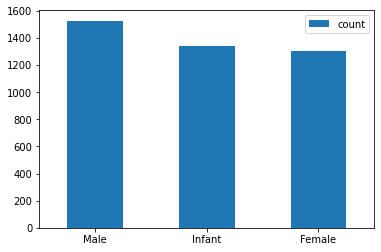

In [5]:
# Korzystając z wybranego pakietu spośród Matplotlib, Pandas lub Seaborn, dla znajdującej się w zbiorze danych cechy
# jakościowej stworzyć wykres słupkowy liczebności poszczególnych wariantów tej cechy.
juicers_bar_plot = juicers_sex_table.plot.bar(y='count', rot=0)

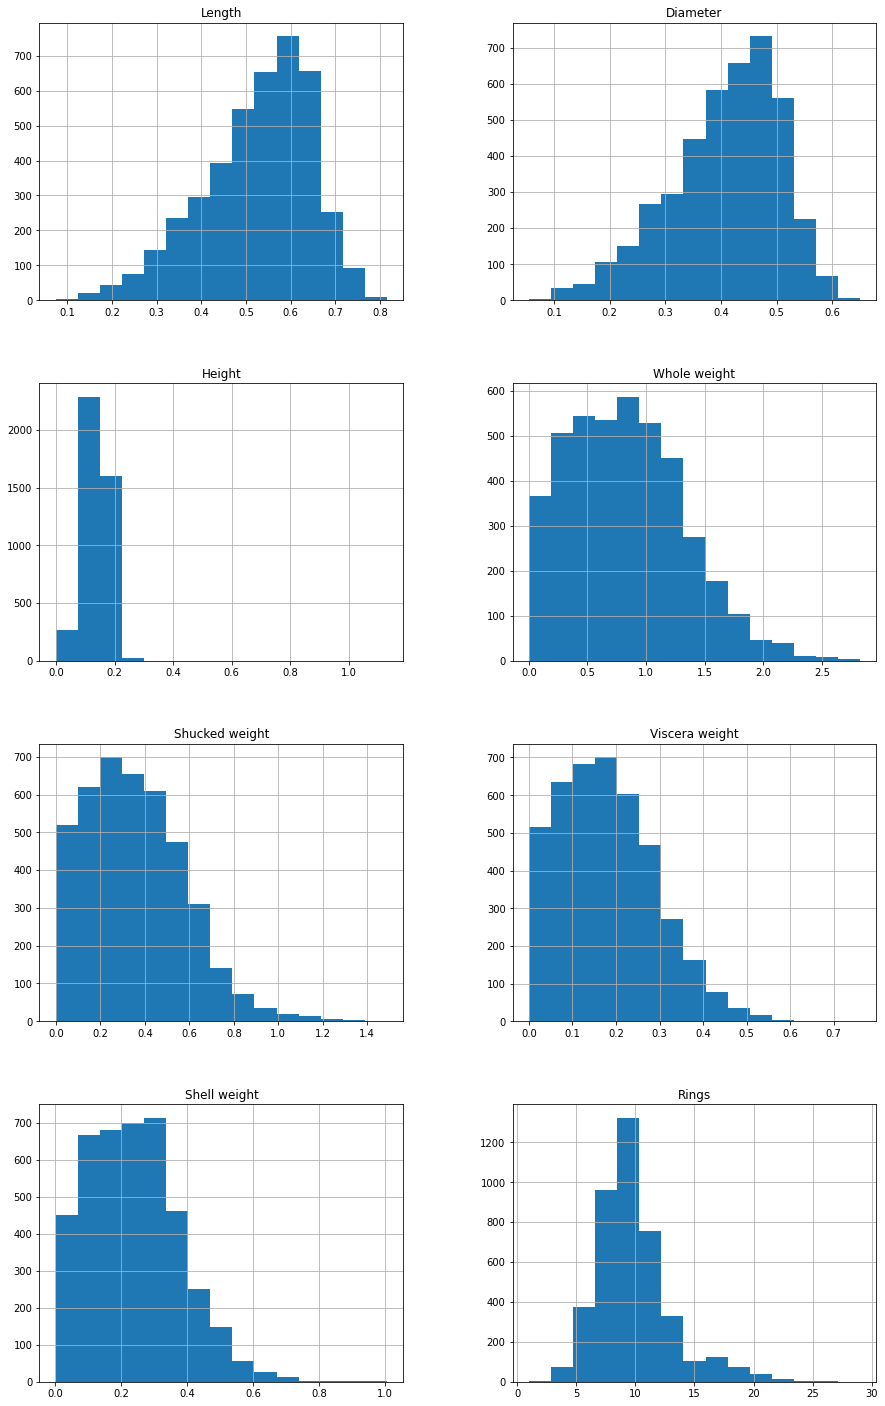

In [6]:
# Korzystając z wybranego pakietu spośród Matplotlib, Pandas lub Seaborn, dla każdej ze znajdujących się w zbiorze danych
# cech ilościowych stworzyć histogram tej cechy. Wszystkie histogramy mają zostać umieszczone na wspólnym obszarze
# wykresów w układzie zawierającym 4 wiersze i 2 kolumny.
histogram = juicers.hist(bins=15, figsize=(15, 25), layout=(4, 2))

In [7]:
# Korzystając z wybranego pakietu spośród Matplotlib, Pandas lub Seaborn, dla każdej pary cech ilościowych znajdujących się
# w zbiorze danych stworzyć wykres punktowy. Wszystkie wykresy punktowe mają zostać umieszczone na wspólnym obszarze
# wykresów w układzie zawierającym 14 wierszy i 2 kolumny.

# scatter_plot = juicers.plot.scatter(x=[juicers], y=[juicers], subplots=True, layout=(4, 2), figsize=(15, 25))

# temp = juicers.columns.drop('Sex')
# for i in juicers.columns.drop('Sex'):
#     temp = temp.drop(i)
#     for j in temp:
#         ax = juicers.plot.scatter(x=j, y=i, subplots=True, figsize=(10, 20), layout=(14, 2))

# s = sns.pairplot(juicers)

In [8]:
# Korzystając z pakietu Pandas, dla wszystkich cech ilościowych znajdujących się w zbiorze danych stworzyć tabelę
# zawierającą macierz korelacji liniowej tych cech.
correlation = juicers.corr().round(2)
correlation

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
Diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
Height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
Whole weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
Shucked weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
Viscera weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
Shell weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
Rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


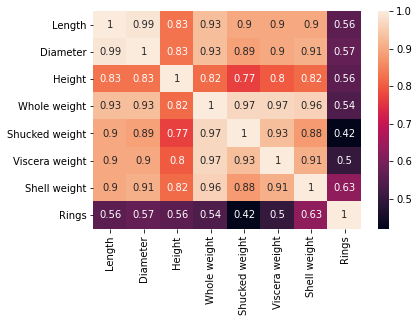

In [9]:
# Korzystając z pakietu Seaborn, dla wszystkich cech ilościowych znajdujących się w zbiorze danych stworzyć
# wykres reprezentujący macierz korelacji liniowej tych cech w postaci mapy cieplnej.
hmap = sns.heatmap(correlation, annot=True)

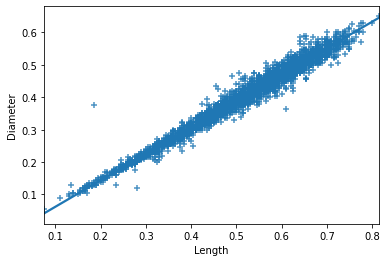

In [10]:
# Korzystając z pakietu Seaborn, dla dwóch cech ilościowych najmocniej skorelowanych liniowo stworzyć wykres
# regresji liniowej.
regplt = sns.regplot(x=juicers.Length, y=juicers.Diameter, marker='+')

In [30]:
import numpy as np
arrays = [
    ['Length', 'Length', 'Length', 'Diameter', 'Diameter', 'Diameter', 'Height', 'Height', 'Height', 'Whole weight', 'Whole weight', 'Whole weight', 'Shucked weight', 'Shucked weight', 'Shucked weight', 'Viscera weight', 'Viscera weight', 'Viscera weight', 'Shell weight', 'Shell weight', 'Shell weight', 'Rings', 'Rings', 'Rings'],
    ['Male', 'Infant', 'Female', 'Male', 'Infant', 'Female', 'Male', 'Infant', 'Female', 'Male', 'Infant', 'Female', 'Male', 'Infant', 'Female', 'Male', 'Infant', 'Female', 'Male', 'Infant', 'Female', 'Male', 'Infant', 'Female'],
]
tuples = list(zip(*arrays))
my_index = pd.MultiIndex.from_tuples(tuples)

# juicers_more_statistics = pd.DataFrame({
#     'mean': juicers[].mean(),
#     'std': juicers.std(),
#     'min': juicers.min(),
#     '25%': juicers.quantile(q=0.25),
#     '50%': juicers.median(),
#     '75%': juicers.quantile(q=0.75),
#     'max': juicers.max(),
# }, index=my_index)

juicers_more_statistics = juicers_more_statistics.round(2)

In [31]:
# Korzystając z pakietu Pandas, dla znajdującej się w zbiorze danych cechy jakościowej stworzyć tabelę rozkładu tej cechy

juicers_more_statistics

mean  std  min  25%  50%  75%  max
Length         Male     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Infant   NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Female   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Diameter       Male     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Infant   NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Female   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Height         Male     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Infant   NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Female   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Whole weight   Male     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Infant   NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Female   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Shucked weight Male     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Infant   NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Female   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Viscera weight Male     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Infant   NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Female   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Shell weight   Male     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Infant   NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Female   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Rings          Male     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Infant   NaN  NaN  NaN  NaN  NaN  NaN  NaN
               Female   NaN  NaN  NaN  NaN  NaN  NaN  NaN